# TUTORIAL: Create your first Machine Learning model with AI notebooks

## Introduction

The aim of this tutorial is to get a first idea of what can be the Machine Learning and to become familiar with OVHcloud's AI Notebooks. 

To do so, take an easy example of **simple linear regression** to predict the scores obtained by students as a function of the number of hours worked.

## Definition

Simple linear regression is a **regression model** that estimates the relationship between two independent variables using a straight line.

The model is represented by a straight line: `y = a.X + b`. 
Where `a` is the slope and `b` is the intercept.

The closer this line is to the line formed by the point cloud, the more accurate the model will be.

## Dataset

To predict a student's exam score based on the amount of time he has studied, we will use a dataset available on [Kaggle](https://www.kaggle.com/): [Students Score Dataset](https://www.kaggle.com/datasets/shubham47/students-score-dataset-linear-regression).

## Code

The Miniconda image is used. You will learn how to create an conda environment, install Python libraries and use them to analyse your data and obtain your first **Machine Learning** model.

### Step 1 - Librairies installation and import

Only three Python libraries are needed to build your first Machine Learning model.
- Pandas
- Matplotlib
- Scikit-learn

You can install these dependencies with the following command.

In [ ]:
!pip install pandas matplotlib sklearn numpy

#### ⚠️ Do not forget to restart the notebook kernel after installations

Once your Python libraries have been successfully installed, you can import them and their functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Step 2 - Visualize your data

The first step is to read a comma separated value (csv) file into DataFrame.

In [2]:
# convert csv file into dataframe
df = pd.read_csv('/workspace/ai-training-examples/notebooks/miniconda/ai-notebooks-introduction/student_scores.csv')

You can then look at the data by checking the size of the dataset, the type of data or the descriptive statistics.

You also need to establish what your **input** and **output** data are.

In [3]:
# dataframe overview 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# dataframe shape
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 25
Number of columns: 2


In [5]:
# data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
# descriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here, the **input** and **output** of our model are easily defined as there are only two variables. 

The aim is to predict the student's `score` from the number of `hours` worked.

- Input `X`: number of `hours` worked
- Output `y`: `score` obtained

In [7]:
# input
X = df.iloc[:, :-1].values.reshape(-1, 1)

In [8]:
# output
y = df.iloc[:, 1].values.reshape(-1, 1)

In order to have an idea of the model to use (linear, polynomial, etc), display your data in the form of a point cloud.

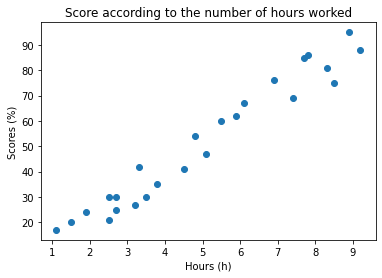

In [9]:
# data visualization 
plt.scatter(X, y)
plt.title('Score according to the number of hours worked')
plt.xlabel('Hours (h)')
plt.ylabel('Scores (%)')
plt.show()

You can see a model `y = f(X)` being formed.

Here it is a **simple linear regression** model.

The model will be `f(X) = a.X + b`.

### Step 3 - Linear regression model definition

`sklearn` is a library commonly used in Machine Learning.

It provides a `LinearRegression` function that fits a linear model with coefficients to minimise the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation.

In [10]:
# define the regressor as linear
regressor = LinearRegression()

# application on the dataset
model = regressor.fit(X, y)

The model is of the form `y = a.X + b`.

Thanks to the `fit` on the data, the values of the **slope** and the **intercept** are calculated.

In [11]:
# slope
a = model.coef_
print('Slope: a =', a.item())

Slope: a = 9.775803390787468


In [12]:
# intercept
b = model.intercept_
print('Intercept: b =', a.item())

Intercept: b = 9.775803390787468


In [13]:
# function
print('y = ', a.item(), '.X +', b.item())

y =  9.775803390787468 .X + 2.48367340537321


In [14]:
# linear prediction line
y_pred = model.predict(X)

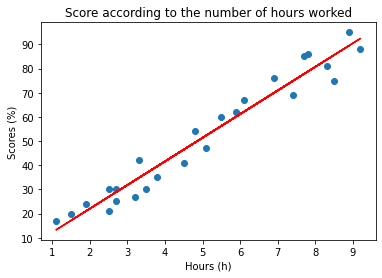

In [15]:
# data visualization with linear prediction line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Score according to the number of hours worked')
plt.xlabel('Hours (h)')
plt.ylabel('Scores (%)')
plt.show()

### Step 4 - Model evaluation

You can evaluate the performance of your model with the linear coefficient of determination **R-squared**.

It is between 0 and 1. When it is close to 0, the predictive power of the model is weak and when it is close to 1, the predictive power of the model is strong.

In [16]:
r_squared = model.score(X, y)
print("R2 =", r_squared)

R2 = 0.9529481969048356


### Step 5 - Make predictions on test values

Here we are testing with 2 new students. 

The first one worked **2.5 hours** for his exam. 

The second worked **9.1 hours** for the same exam. 

In [17]:
X_test = [[2.5], [9.1]]

The theoretical results for these two students are as follows:

In [18]:
new_prediction = model.predict(X_test)
print("Student n°1, theorical result:", round(float(new_prediction[0]), 2), "%")
print("Student n°2, theorical result:", round(float(new_prediction[1]), 2), "%")

Student n°1, theorical result: 26.92 %
Student n°2, theorical result: 91.44 %


## Conclusion

- The R-squared value is close to 1 (arround 0.95) => the model seems to perfom well.

#### Now that you have successfully manipulated the *OVHcloud AI Notebooks* tool, it's your turn to play!